In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
data=pd.read_csv('airline-passenger-traffic+(1).csv',header=None)

In [4]:
data.columns=['month','passengers']

In [5]:
data

,month,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [6]:
data['month']=pd.to_datetime(data.month,format="%Y-%m")

In [7]:
data=data.set_index('month')

Text(0.5, 1.0, 'Airline passsengers over the years')

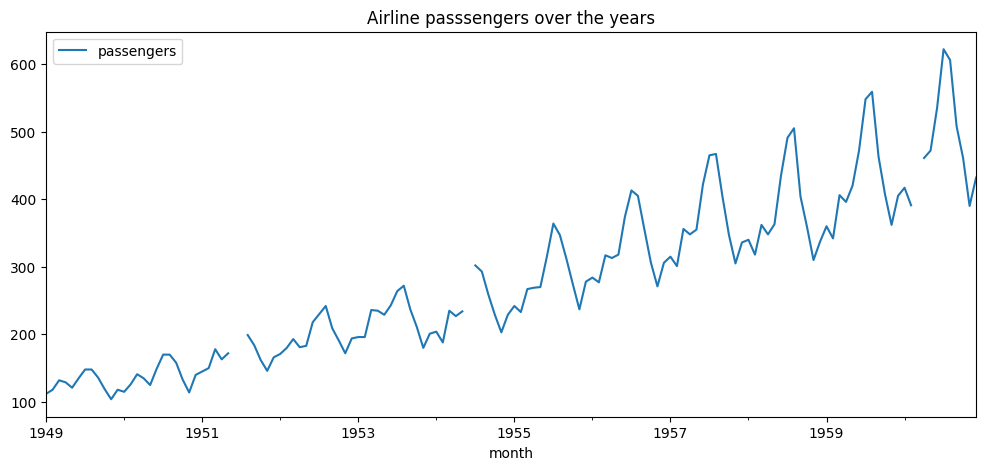

In [8]:
plt.figure(figsize=(12,5))
data.passengers.plot()
plt.legend(loc='best')
plt.title("Airline passsengers over the years")

In [9]:
data=data.assign(mean_inputation=data.passengers.fillna(data.passengers.mean()))

Text(0.5, 1.0, 'Airline passsengers over the years')

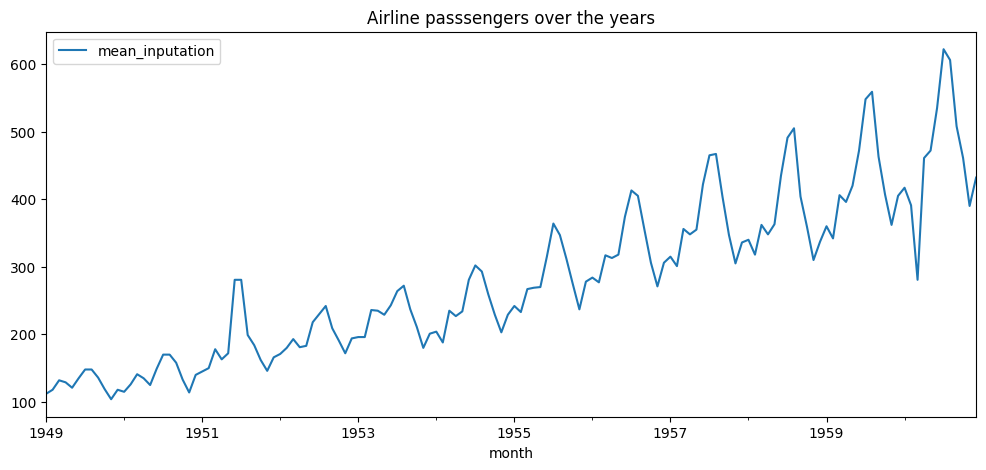

In [10]:
plt.figure(figsize=(12,5))
data.mean_inputation.plot()
plt.legend(loc='best')
plt.title("Airline passsengers over the years")

In [11]:
data=data.assign(linear_interpolation_inputation=data.passengers.interpolate(method='linear'))

Text(0.5, 1.0, 'Airline passsengers over the years')

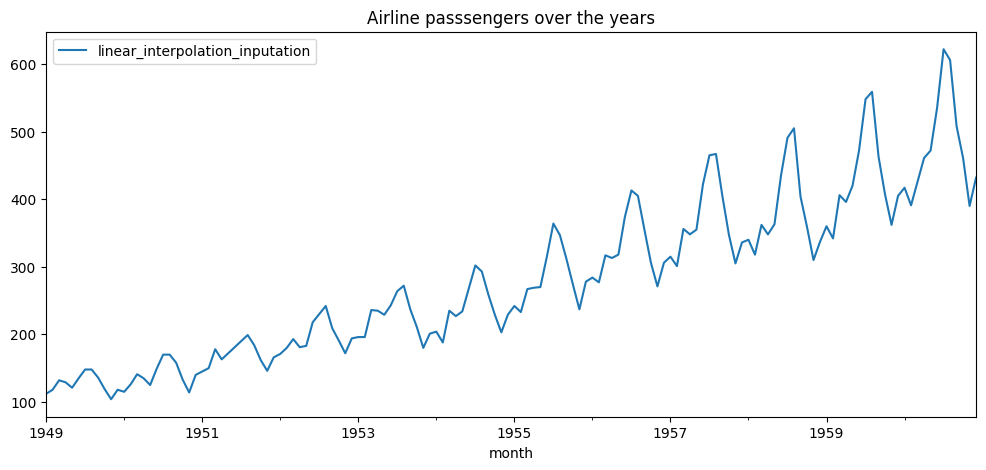

In [12]:
plt.figure(figsize=(12,5))
data.linear_interpolation_inputation.plot()
plt.legend(loc='best')
plt.title("Airline passsengers over the years")

In [13]:
data1=pd.read_csv('Metrail+dataset.csv')
data1

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN
...,...,...
154,Nov-03,2091.0
155,Dec-03,2155.0
156,Jan-04,1848.0
157,Feb-04,1852.0


In [14]:
data1.Month

0      Jan-91
1      Feb-91
2      Mar-91
3      Apr-91
4      May-91
        ...  
154    Nov-03
155    Dec-03
156    Jan-04
157    Feb-04
158    Mar-04
Name: Month, Length: 159, dtype: object

In [15]:
data1['Month']=pd.to_datetime(data1.Month, format="%b-%y")

In [16]:
data1['Travellers(\'000)'].isna().mean()

0.06918238993710692

In [17]:
data1['forward fill']=data1['Travellers(\'000)'].fillna(method='ffill')

In [18]:
data1['forward fill'].mean()

1838.685534591195

In [19]:
data1['backward fill']=data1['Travellers(\'000)'].fillna(method='bfill')

In [20]:
data1['backward fill'].mean()

1834.446540880503

In [21]:
data1['Linear interpolation']=data1['Travellers(\'000)'].interpolate(method='linear')

In [22]:
data1['Linear interpolation'].mean()

1836.566037735849

### Box plot and inter qurtile range

<Axes: xlabel='passengers'>

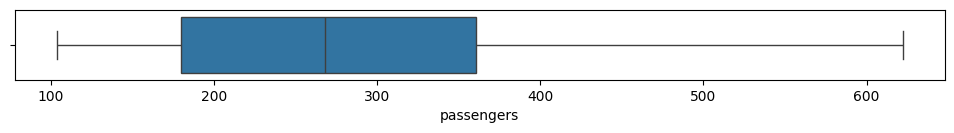

In [24]:
fig=plt.figure(figsize=(12,2))
plt.subplot(2,1,1)
sns.boxplot(x=data.passengers,whis=1.5)

<Axes: xlabel='passengers', ylabel='Count'>

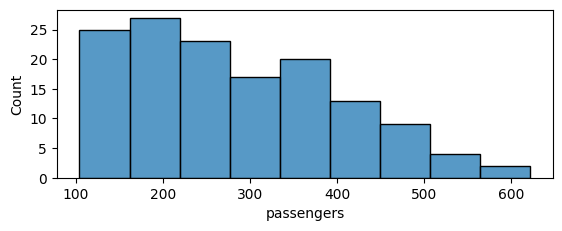

In [25]:
plt.subplot(2,1,2)
sns.histplot(x=data.passengers)

In [26]:
import statsmodels.api as sm

In [27]:
decomposition=sm.tsa.seasonal_decompose(data.linear_interpolation_inputation, model='additive')

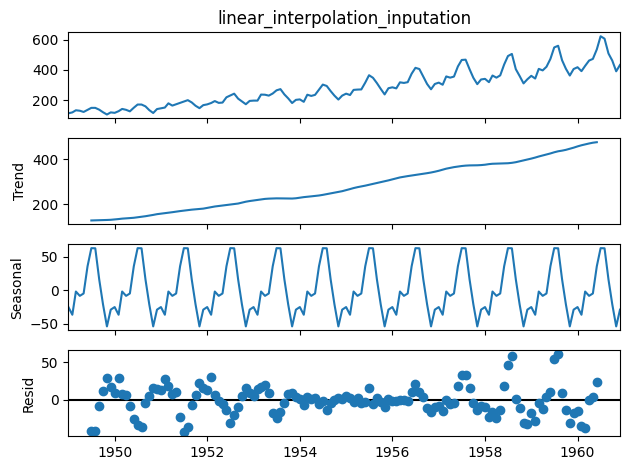

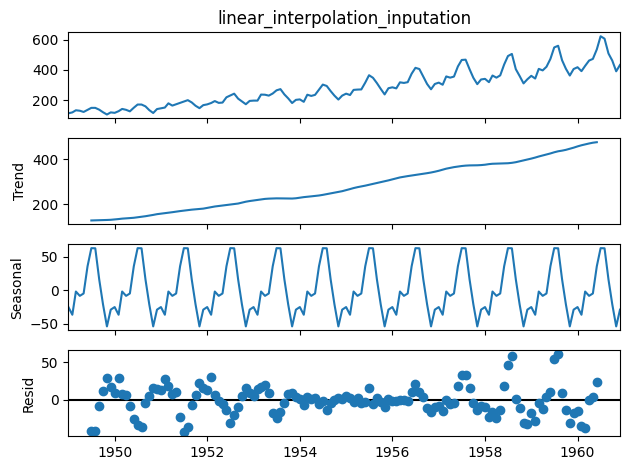

In [28]:
decomposition.plot()

In [29]:
decompose1=sm.tsa.seasonal_decompose(data.linear_interpolation_inputation, model='multiplicative')

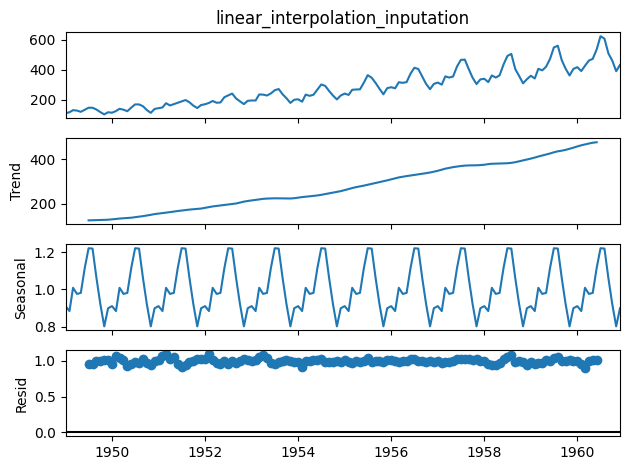

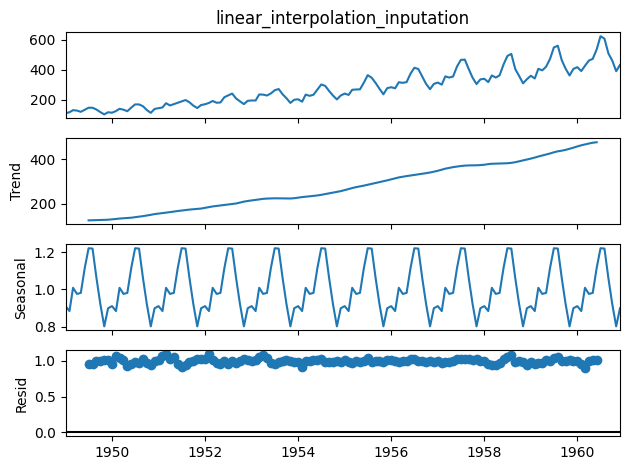

In [30]:
decompose1.plot()

## train test split

In [32]:
data.shape

(144, 3)

In [33]:
train_len=2*(data.shape[0]/3)

In [34]:
train=data[:int(train_len)]

In [35]:
test=data[int(train_len):]

In [36]:
test.shape,train.shape

((48, 3), (96, 3))

In [37]:
predicted=test.copy()

In [38]:
predicted['naive']=train.passengers[-1]

In [39]:
predicted

,passengers,mean_inputation,linear_interpolation_inputation,naive
month,,,,
1957-01-01,315.0,315.000000,315.0,306.0
1957-02-01,301.0,301.000000,301.0,306.0
1957-03-01,356.0,356.000000,356.0,306.0
1957-04-01,348.0,348.000000,348.0,306.0
1957-05-01,355.0,355.000000,355.0,306.0
1957-06-01,422.0,422.000000,422.0,306.0
1957-07-01,465.0,465.000000,465.0,306.0
1957-08-01,467.0,467.000000,467.0,306.0
1957-09-01,404.0,404.000000,404.0,306.0


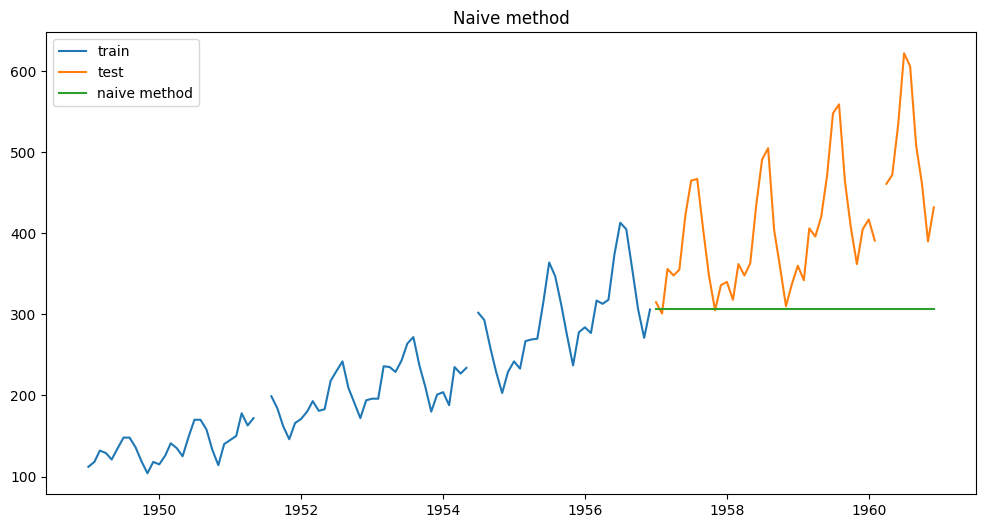

In [40]:
plt.figure(figsize=(12,6))
plt.plot(train.passengers, label='train')
plt.plot(test.passengers, label='test')
plt.plot(predicted.naive, label='naive method')
plt.legend(loc="best")
plt.title('Naive method')
plt.show()

In [41]:
predicted['average']=train.passengers.mean()

Text(0.5, 1.0, 'SImple average method')

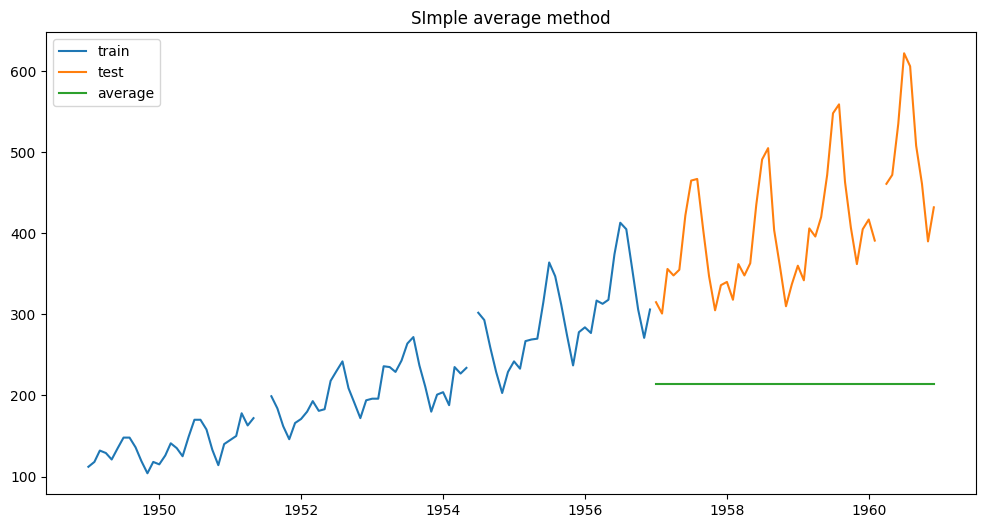

In [42]:
plt.figure(figsize=(12,6))
plt.plot(train.passengers, label='train')
plt.plot(test.passengers, label='test')
plt.plot(predicted.average, label='average')
plt.legend(loc="best")
plt.title("SImple average method")

## MAP and RMSE calculations

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,predicted.naive)).round(2)

In [46]:
mape=np.mean((np.absolute(test.passengers-predicted.naive)/test.passengers)*100).round(2)

In [47]:
mape,rmse

(23.55, 10.39)

np.mean(np.absolute(test.passengers-predicted.naive)/test.passengers).round(2)

In [49]:
nave_df=pd.DataFrame({'Method':["naive"],"RMSE":[rmse],'MAPE':[mape]})

In [50]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,predicted.average)).round(2)

In [51]:
mape=np.mean(np.absolute(test.passengers-predicted.average)/test.passengers).round(2)

In [52]:
average_df=pd.DataFrame({'Method':["Average"],"RMSE":[rmse],'MAPE':[mape]})

In [53]:
results=pd.concat([nave_df, average_df])

In [54]:
data2=pd.read_csv("exchange-rate-twi.csv")
data2

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2
...,...,...
299,300,49.6
300,301,48.5
301,302,48.4
302,303,51.0


In [55]:
length=212

In [56]:
data2_train=data2[:length]

In [57]:
data2_test=data2[length:]

In [58]:
data2_test['average']=data2_train['Exchange Rate TWI'].mean()

In [59]:
data2_test['naive']=data2_train['Exchange Rate TWI'].iloc[-1]

In [60]:
rmse=mean_absolute_error(data2_test['Exchange Rate TWI'],data2_test['naive']).round(2)
rmse

4.92

In [61]:
mape=np.mean(np.absolute(data2_test['Exchange Rate TWI']-data2_test['naive'])*100/data2_test['Exchange Rate TWI']).round(2)
Accuracy=1-mape
mape,Accuracy

(8.41, -7.41)

In [62]:
naive_df=pd.DataFrame({'Method':["naive"],"RMSE":[rmse],'MAPE':[mape]})

In [63]:
rmse=mean_absolute_error(data2_test['Exchange Rate TWI'],data2_test['average']).round(2)
rmse

32.14

In [64]:
mape=np.mean(np.absolute(data2_test['Exchange Rate TWI']-data2_test['average'])*100/data2_test['Exchange Rate TWI']).round(2)
mape

58.12

In [65]:
average_df=pd.DataFrame({'Method':["average"],"RMSE":[rmse],'MAPE':[mape]})

In [66]:
pd.concat([naive_df,average_df])

,Method,RMSE,MAPE
0,naive,4.92,8.41
0,average,32.14,58.12


## SImple moving average 

In [68]:
y_hat_sma=data.copy()
period=12

In [69]:
y_hat_sma['predicted']=y_hat_sma.linear_interpolation_inputation.rolling(period).mean()
y_hat_sma['predicted'][int(train_len):]=y_hat_sma.predicted[int(train_len-1)]

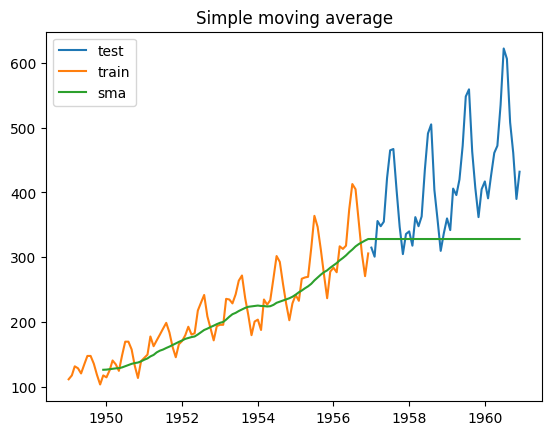

In [70]:
plt.figure()
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(y_hat_sma.predicted, label='sma')
plt.title("Simple moving average")
plt.legend(loc='best')

In [71]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_sma.predicted[int(train_len):])).round(2)
rmse

9.45

In [72]:
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_sma.predicted[int(train_len):])*100/test.linear_interpolation_inputation)
mape

19.253925942457887

In [73]:
simple_moving=pd.DataFrame({'Method':["Simple moving average 12"],"RMSE":[rmse],'MAPE':[mape]})

In [74]:
results=pd.concat([results,simple_moving])

In [75]:
period=6

In [76]:
y_hat_sma['predicted']=y_hat_sma.linear_interpolation_inputation.rolling(period).mean()
y_hat_sma['predicted'][int(train_len):]=y_hat_sma.predicted[int(train_len-1)]

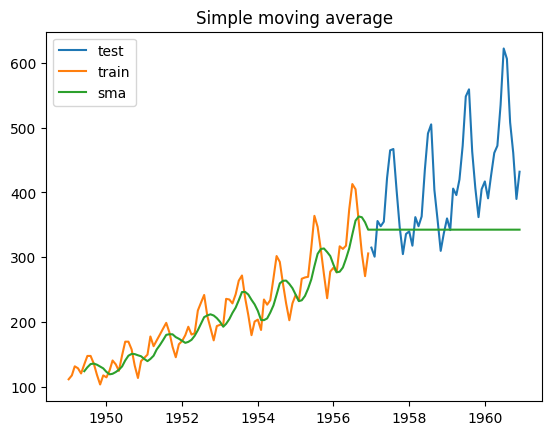

In [77]:
plt.figure()
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(y_hat_sma.predicted, label='sma')
plt.title("Simple moving average")
plt.legend(loc='best')

In [78]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_sma.predicted[int(train_len):])).round(2)
rmse

8.86

In [79]:
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_sma.predicted[int(train_len):])*100/test.linear_interpolation_inputation)
mape

16.816108252499305

In [80]:
simple_moving=pd.DataFrame({'Method':["Simple moving average 6"],"RMSE":[rmse],'MAPE':[mape]})

In [81]:
results=pd.concat([results,simple_moving])
results

,Method,RMSE,MAPE
0,naive,10.39,23.550000
0,Average,14.14,0.470000
0,Simple moving average 12,9.45,19.253926
0,Simple moving average 6,8.86,16.816108


In [82]:
period=3

In [83]:
y_hat_sma['predicted']=y_hat_sma.linear_interpolation_inputation.rolling(period).mean()
y_hat_sma['predicted'][int(train_len):]=y_hat_sma.predicted[int(train_len-1)]

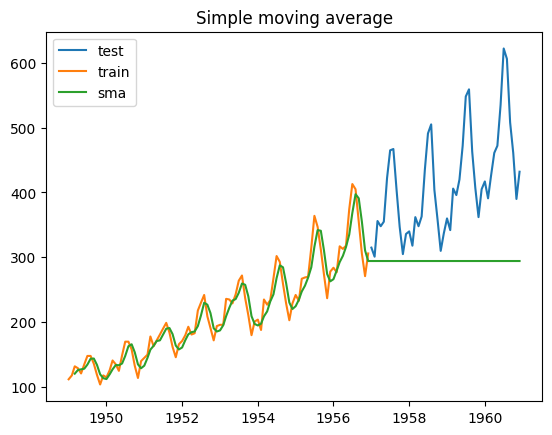

In [84]:
plt.figure()
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(y_hat_sma.predicted, label='sma')
plt.title("Simple moving average")
plt.legend(loc='best')

In [85]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_sma.predicted[int(train_len):])).round(2)
rmse

10.92

In [86]:
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_sma.predicted[int(train_len):])*100/test.linear_interpolation_inputation)
mape

26.476497229506617

In [87]:
simple_moving=pd.DataFrame({'Method':["Simple moving average 3"],"RMSE":[rmse],'MAPE':[mape]})

In [88]:
results=pd.concat([results,simple_moving])
results

,Method,RMSE,MAPE
0,naive,10.39,23.550000
0,Average,14.14,0.470000
0,Simple moving average 12,9.45,19.253926
0,Simple moving average 6,8.86,16.816108
0,Simple moving average 3,10.92,26.476497


In [89]:
period=12

In [90]:
data2['mwa']=data2['Exchange Rate TWI'].rolling(period).mean()
data2['mwa'][length:]=data2['mwa'].iloc[length-1]

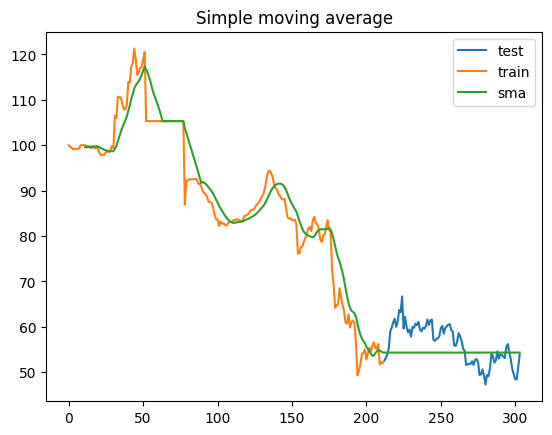

In [91]:
plt.figure()
plt.plot(data2_test['Exchange Rate TWI'], label='test')
plt.plot(data2_train['Exchange Rate TWI'], label='train')
plt.plot(data2['mwa'], label='sma')
plt.title("Simple moving average")
plt.legend(loc='best')

In [92]:
rmse=mean_absolute_error(data2_test['Exchange Rate TWI'],data2['mwa'][length:]).round(2)
rmse

3.98

In [93]:
mape=np.mean(np.absolute(data2_test['Exchange Rate TWI']-data2['mwa'][length:])*100/data2_test['Exchange Rate TWI']).round(2)
mape

6.96

In [94]:
period=6

In [95]:
data2['mwa']=data2['Exchange Rate TWI'].rolling(period).mean()
data2['mwa'][length:]=data2['mwa'].iloc[length-1]

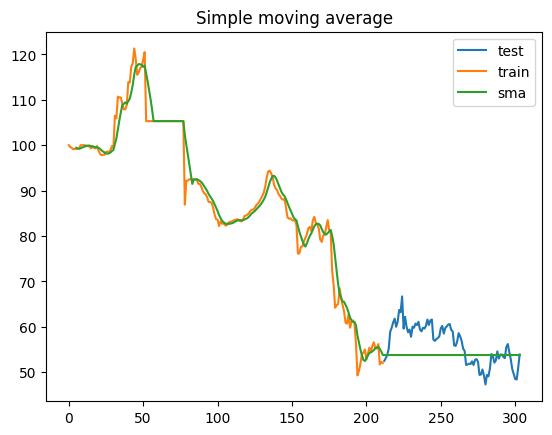

In [96]:
plt.figure()
plt.plot(data2_test['Exchange Rate TWI'], label='test')
plt.plot(data2_train['Exchange Rate TWI'], label='train')
plt.plot(data2['mwa'], label='sma')
plt.title("Simple moving average")
plt.legend(loc='best')

In [97]:
rmse=mean_absolute_error(data2_test['Exchange Rate TWI'],data2['mwa'][length:]).round(2)
rmse

4.11

In [98]:
mape=np.mean(np.absolute(data2_test['Exchange Rate TWI']-data2['mwa'][length:])*100/data2_test['Exchange Rate TWI']).round(2)
mape

7.13

In [99]:
period=3

In [100]:
data2['mwa']=data2['Exchange Rate TWI'].rolling(period).mean()
data2['mwa'][length:]=data2['mwa'].iloc[length-1]

In [101]:
rmse=mean_absolute_error(data2_test['Exchange Rate TWI'],data2['mwa'][length:]).round(2)
rmse

4.92

In [102]:
mape=np.mean(np.absolute(data2_test['Exchange Rate TWI']-data2['mwa'][length:])*100/data2_test['Exchange Rate TWI']).round(2)
mape

8.41

In [103]:
## Simple exponential smoothing

In [104]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [105]:
model=SimpleExpSmoothing(train.linear_interpolation_inputation)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [106]:
?model.fit

Signature:
model.fit(
    smoothing_level=None,
    *,
    optimized=True,
    start_params=None,
    initial_level=None,
    use_brute=True,
    use_boxcox=None,
    remove_bias=False,
    method=None,
    minimize_kwargs=None,
)
Docstring:
Fit the model

Parameters
----------
smoothing_level : float, optional
    The smoothing_level value of the simple exponential smoothing, if
    the value is set then this value will be used as the value.
optimized : bool, optional
    Estimate model parameters by maximizing the log-likelihood.
start_params : ndarray, optional
    Starting values to used when optimizing the fit.  If not provided,
    starting values are determined using a combination of grid search
    and reasonable values based on the initial values of the data.
initial_level : float, optional
    Value to use when initializing the fitted level.
use_brute : bool, optional
    Search for good starting values using a brute force (grid)
    optimizer. If False, a naive set of starti

In [107]:
model=SimpleExpSmoothing(train.linear_interpolation_inputation)
model_fit=model.fit( smoothing_level=0.2,optimized=False)
model_fit.params

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
y_hat_ses=test.copy()

In [109]:
y_hat_ses['predicted']=model_fit.forecast(48)

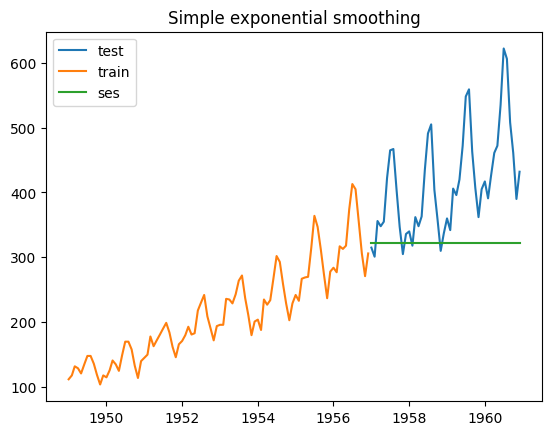

In [110]:
plt.figure()
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(y_hat_ses.predicted, label='ses')
plt.title("Simple exponential smoothing")
plt.legend(loc='best')

In [111]:
data3=pd.read_csv("Daily+temperature+data.csv")

In [112]:
data3

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5
...,...,...
725,12/27/2018,14.0
726,12/28/2018,13.6
727,12/29/2018,13.5
728,12/30/2018,15.7


In [113]:
length=511

In [114]:
data3_train=data3[:length]
data3_test=data3[length:]
data3_test.shape

(219, 2)

In [115]:
model=SimpleExpSmoothing(data3_train['Temperature(Min)'])

In [116]:
model_fit=model.fit(smoothing_level=0.2,optimized=False)

In [117]:
data3_test['predicted']=model_fit.forecast(219)

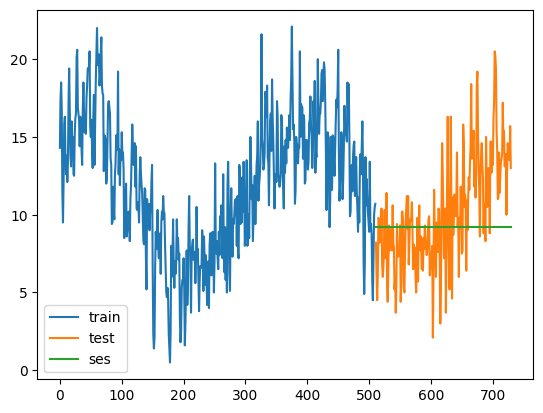

In [118]:
plt.figure()
plt.plot(data3_train['Temperature(Min)'], label='train')
plt.plot(data3_test['Temperature(Min)'], label='test')
plt.plot(data3_test.predicted, label='ses')
plt.legend(loc='best')
plt.show()

In [119]:
rmse=np.sqrt(mean_absolute_error(data3_test['Temperature(Min)'],data3_test.predicted)).round(2)

In [120]:
mape=np.mean(np.absolute(data3_test['Temperature(Min)']-data3_test.predicted)*100/data3_test['Temperature(Min)']).round(2)

In [121]:
rmse,mape

(1.66, 30.24)

In [122]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [123]:
model=ExponentialSmoothing(np.asarray(data.linear_interpolation_inputation), seasonal_periods=12, trend='additive', seasonal=None)

In [124]:
model_fit=model.fit(smoothing_level=0.8, smoothing_trend=0.01, optimized=False)
print(model_fit.params)

{'smoothing_level': 0.8, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.0606060606060677, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [125]:
y_hat_es=test.copy()
y_hat_es['predicted']=model_fit.forecast(48)
y_hat_es.predicted

month
1957-01-01    429.473237
1957-02-01    431.477074
1957-03-01    433.480910
1957-04-01    435.484746
1957-05-01    437.488582
1957-06-01    439.492418
1957-07-01    441.496254
1957-08-01    443.500090
1957-09-01    445.503927
1957-10-01    447.507763
1957-11-01    449.511599
1957-12-01    451.515435
1958-01-01    453.519271
1958-02-01    455.523107
1958-03-01    457.526944
1958-04-01    459.530780
1958-05-01    461.534616
1958-06-01    463.538452
1958-07-01    465.542288
1958-08-01    467.546124
1958-09-01    469.549961
1958-10-01    471.553797
1958-11-01    473.557633
1958-12-01    475.561469
1959-01-01    477.565305
1959-02-01    479.569141
1959-03-01    481.572977
1959-04-01    483.576814
1959-05-01    485.580650
1959-06-01    487.584486
1959-07-01    489.588322
1959-08-01    491.592158
1959-09-01    493.595994
1959-10-01    495.599831
1959-11-01    497.603667
1959-12-01    499.607503
1960-01-01    501.611339
1960-02-01    503.615175
1960-03-01    505.619011
1960-04-01    507.6

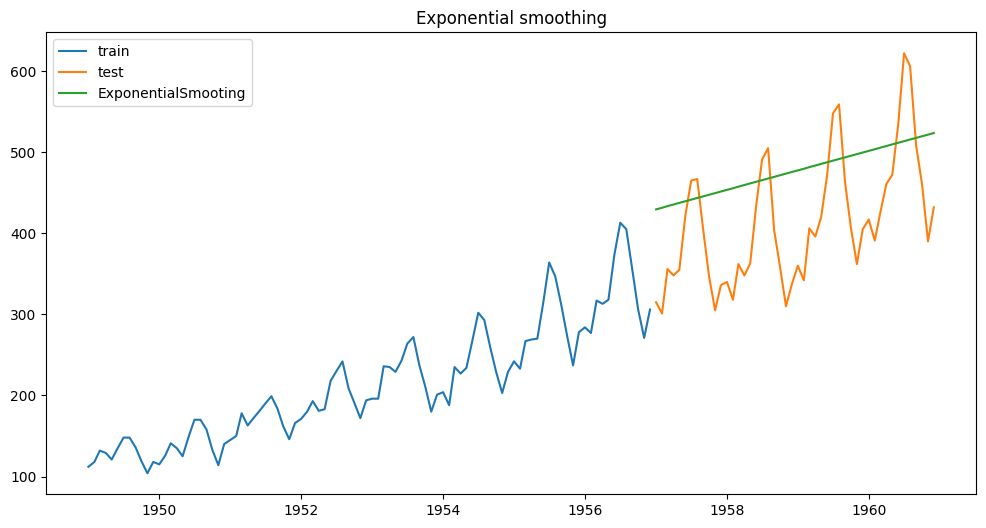

In [126]:
plt.figure(figsize=(12,6))
plt.plot(train.linear_interpolation_inputation,label="train")
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(y_hat_es.predicted, label='ExponentialSmooting')
plt.title("Exponential smoothing")
plt.legend(loc="best")
plt.show()

In [127]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_es.predicted))
rmse

9.056197198014315

In [128]:
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_es.predicted)*100/test.linear_interpolation_inputation).round(2)
mape

21.76

### Holt winters additive method

In [130]:
model=ExponentialSmoothing(np.asarray(test.linear_interpolation_inputation), seasonal_periods=12, seasonal='add', trend='additive')
model_fit=model.fit(optimized=True) 
print(model_fit.params)

{'smoothing_level': 0.5984764231724288, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 356.7936372199077, 'initial_trend': 2.656767121240654, 'initial_seasons': array([-41.95147999, -64.60805083, -17.76481672, -19.67158528,
        -8.07823834,  52.76496972, 115.60832705, 115.70138228,
        23.54501268, -30.36181207, -84.76850686, -51.67543285]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [131]:
y_hat=test.copy()

In [132]:
y_hat['predicted']=model_fit.forecast(48)

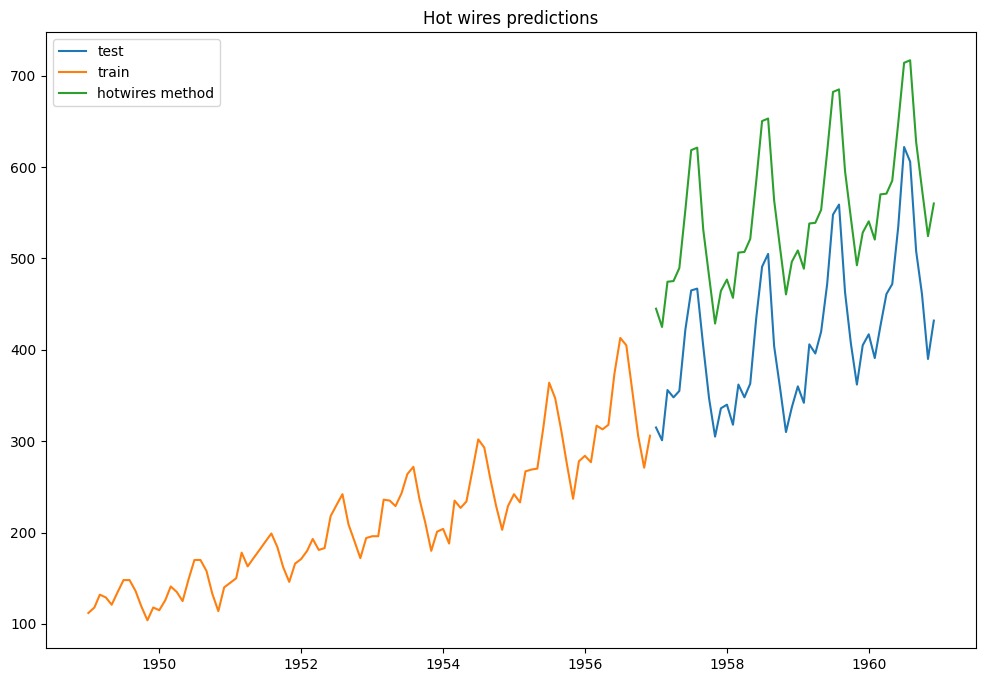

In [133]:
plt.figure(figsize=(12,8))
plt.plot(y_hat.linear_interpolation_inputation,label='test')
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(y_hat.predicted, label='hotwires method')
plt.legend(loc='best')
plt.title("Hot wires predictions")
plt.show()

In [134]:
rmse=np.sqrt(mean_absolute_error(y_hat.linear_interpolation_inputation,y_hat.predicted)).round(2)
rmse

11.61

In [135]:
mape=np.mean(np.absolute(y_hat.linear_interpolation_inputation-y_hat.predicted)*100/y_hat.linear_interpolation_inputation).round(2)
mape

33.89

In [136]:
holtwinter_df=pd.DataFrame({"Method":["Holt winter additive method"], "RMSE":[rmse], 'MAPE':[mape]})
holtwinter_df

,Method,RMSE,MAPE
0,Holt winter additive method,11.61,33.89


In [137]:
results=pd.concat([results,holtwinter_df])

In [138]:
results

,Method,RMSE,MAPE
0,naive,10.39,23.550000
0,Average,14.14,0.470000
0,Simple moving average 12,9.45,19.253926
0,Simple moving average 6,8.86,16.816108
0,Simple moving average 3,10.92,26.476497
0,Holt winter additive method,11.61,33.890000


### Holt winters multiplicative method

In [140]:
model=ExponentialSmoothing(np.asarray(test.linear_interpolation_inputation), seasonal_periods=12, seasonal='mul', trend='additive')
model_fit=model.fit(optimized=True) 
print(model_fit.params)

{'smoothing_level': 0.40475517874048816, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 347.41435641751036, 'initial_trend': 2.9560803438659007, 'initial_seasons': array([0.90882587, 0.85108312, 0.96599903, 0.9645796 , 0.99289933,
       1.13862991, 1.29186443, 1.28722421, 1.06390985, 0.93620589,
       0.80640001, 0.88525182]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [141]:
y_hat['predicted_mul']=model_fit.forecast(48)

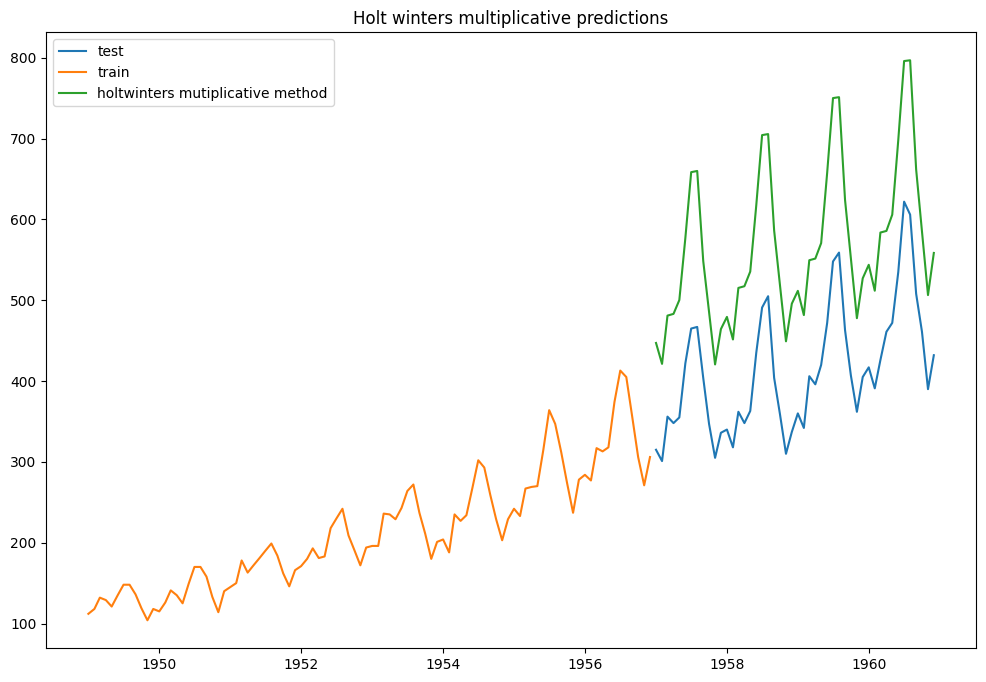

In [142]:
plt.figure(figsize=(12,8))
plt.plot(y_hat.linear_interpolation_inputation,label='test')
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(y_hat.predicted_mul, label='holtwinters mutiplicative method')
plt.legend(loc='best')
plt.title("Holt winters multiplicative predictions")
plt.show()

In [143]:
rmse=np.sqrt(mean_absolute_error(y_hat.linear_interpolation_inputation,y_hat.predicted_mul)).round(2)
rmse

12.34

In [144]:
mape=np.mean(np.absolute(y_hat.linear_interpolation_inputation-y_hat.predicted)*100/y_hat.linear_interpolation_inputation).round(2)
mape

33.89

In [145]:
holtwinters_mul_df=pd.DataFrame({"Method":["Holt winters mul method"], "RMSE":[rmse], 'MAPE':[mape]})
holtwinters_mul_df

,Method,RMSE,MAPE
0,Holt winters mul method,12.34,33.89


In [146]:
pd.concat([results,holtwinters_mul_df])

,Method,RMSE,MAPE
0,naive,10.39,23.550000
0,Average,14.14,0.470000
0,Simple moving average 12,9.45,19.253926
0,Simple moving average 6,8.86,16.816108
0,Simple moving average 3,10.92,26.476497
0,Holt winter additive method,11.61,33.890000
0,Holt winters mul method,12.34,33.890000


In [147]:
data3

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5
...,...,...
725,12/27/2018,14.0
726,12/28/2018,13.6
727,12/29/2018,13.5
728,12/30/2018,15.7


In [148]:
data3_train.shape, data3_test.shape

((511, 2), (219, 3))

In [149]:
model=ExponentialSmoothing(np.asarray(data3_train['Temperature(Min)']))
model_fit=model.fit(smoothing_level=0.5, smoothing_trend=0.01, optimized=False)
print(model_fit.params)

{'smoothing_level': 0.5, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 16.039999999999992, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [150]:
length=512

In [151]:
data3_test['predicted_holt']=model_fit.forecast(219)

In [152]:
data3_test

,Date,Temperature(Min),predicted,predicted_holt
511,5/27/2018,8.2,9.1997,10.051082
512,5/28/2018,6.1,9.1997,10.051082
513,5/29/2018,4.5,9.1997,10.051082
514,5/30/2018,6.1,9.1997,10.051082
515,5/31/2018,9.8,9.1997,10.051082
...,...,...,...,...
725,12/27/2018,14.0,9.1997,10.051082
726,12/28/2018,13.6,9.1997,10.051082
727,12/29/2018,13.5,9.1997,10.051082
728,12/30/2018,15.7,9.1997,10.051082


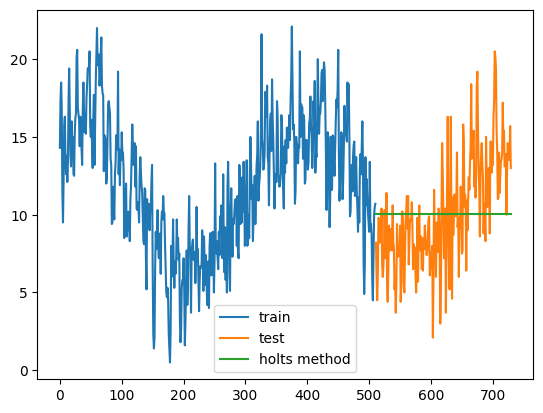

In [153]:
plt.figure()
plt.plot(data3_train['Temperature(Min)'], label='train')
plt.plot(data3_test['Temperature(Min)'], label='test')
plt.plot(data3_test.predicted_holt, label='holts method')
plt.legend(loc='best')
plt.show()

In [154]:
rmse=np.sqrt(mean_absolute_error(data3_test['Temperature(Min)'],data3_test.predicted_holt)).round(2)

In [155]:
mape=np.mean(np.absolute(data3_test['Temperature(Min)']-data3_test.predicted_holt)*100/data3_test['Temperature(Min)']).round(2)

In [156]:
rmse,mape

(1.65, 32.66)

In [157]:
model=ExponentialSmoothing(np.asarray(data3_train['Temperature(Min)']), seasonal_periods=30, seasonal='add', trend='additive')
model_fit=model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.6742806265784239, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 14.939927341969263, 'initial_trend': -0.009863743288702249, 'initial_seasons': array([ 0.52721923,  0.0327804 ,  0.05441154,  0.56426333,  0.03883313,
       -0.13954239, -0.02968047,  0.62135482,  0.77238683,  0.45284436,
        0.53329168,  0.27845267, -0.71756914,  0.23347172,  0.43156832,
        0.4590873 , -0.58986708,  0.21999271, -0.08190415, -0.76027789,
       -0.53865381,  0.29473905, -0.87775241, -1.57377062, -0.71096201,
       -0.7069771 , -0.43828653,  0.17746529,  0.69320868,  0.70896127]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [158]:
data3_test['hwa']=model_fit.forecast(219)

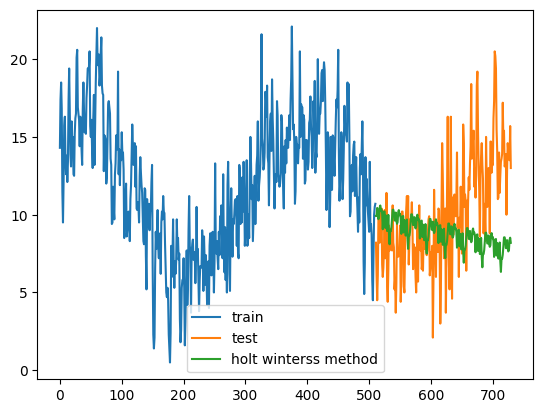

In [159]:
plt.figure()
plt.plot(data3_train['Temperature(Min)'], label='train')
plt.plot(data3_test['Temperature(Min)'], label='test')
plt.plot(data3_test.hwa, label='holt winterss method')
plt.legend(loc='best')
plt.show()

In [160]:
rmse=mean_absolute_error(data3_test['Temperature(Min)'],data3_test.hwa).round(2)

In [161]:
mape=np.mean(np.absolute(data3_test['Temperature(Min)']-data3_test.hwa)*100/data3_test['Temperature(Min)']).round(2)

In [162]:
rmse,mape

(3.25, 34.36)

In [163]:
bitcoin_data=pd.read_csv('Bitcoinfinal+(4).csv',header=None)
print(bitcoin_data.shape)
bitcoin_data.tail()

(32, 2)


,0,1
27,27,1435.2
28,28,2191.8
29,29,2420.7
30,30,2856.0
31,31,4268.8


In [164]:

bitcoin_data.columns=['timestamp','value']

<Axes: >

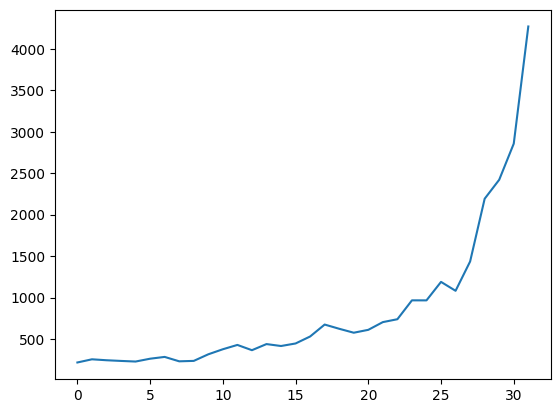

In [165]:
bitcoin_data.value.plot()

In [166]:
bitcoin_train=bitcoin_data[:29]
bitcoin_test=bitcoin_data[29:]
bitcoin_test.value

29    2420.7
30    2856.0
31    4268.8
Name: value, dtype: float64

In [167]:
bitcoin_test['naive']=bitcoin_train.value.iloc[-1]

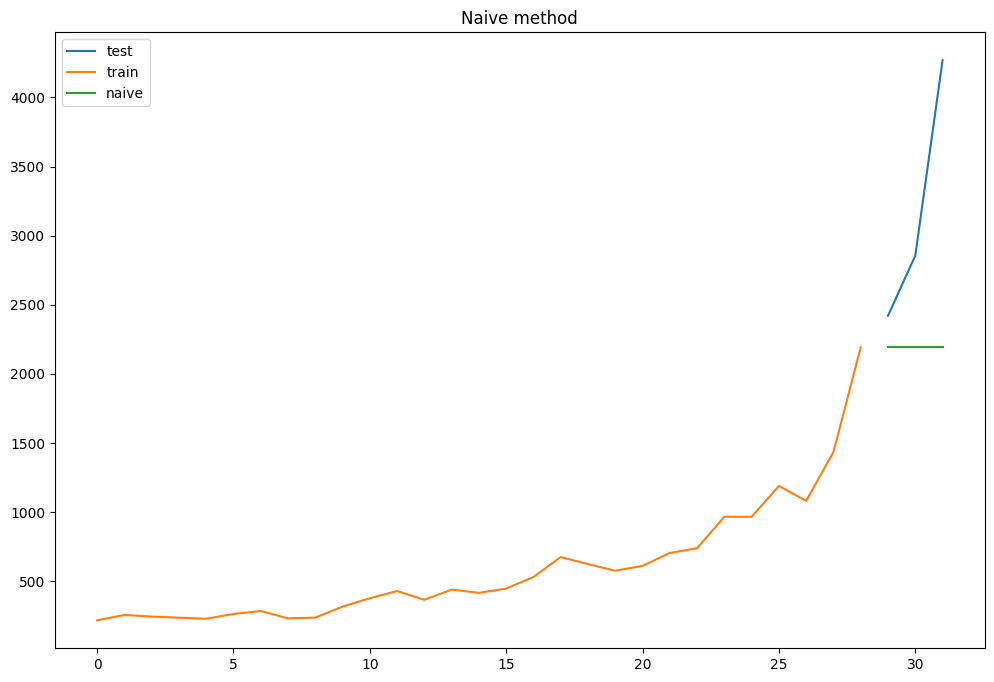

In [168]:
plt.figure(figsize=(12,8))
plt.plot(bitcoin_test.value, label="test")
plt.plot(bitcoin_train.value, label='train')
plt.plot(bitcoin_test.naive, label="naive")
plt.legend(loc='best')
plt.title("Naive method")
plt.show()

In [169]:
bitcoin_test.naive

29    2191.8
30    2191.8
31    2191.8
Name: naive, dtype: float64

In [170]:
rmse=np.sqrt(mean_absolute_error(bitcoin_test.value,bitcoin_test.naive)).round(3)
rmse

31.465

In [171]:
mape=np.mean(np.absolute(bitcoin_test.value-bitcoin_test.naive)*100/bitcoin_data.value).round(3)
mape

27.123

In [172]:
bitcoin_results=pd.DataFrame({"Method":["Naive method"], "RMSE":[rmse], "MAPE":[mape]})
bitcoin_test.value

29    2420.7
30    2856.0
31    4268.8
Name: value, dtype: float64

In [173]:
#Simple average method
bitcoin_test['avg']=bitcoin_train.value.mean()

In [174]:
bitcoin_test.avg

29    595.751724
30    595.751724
31    595.751724
Name: avg, dtype: float64

In [175]:
bitcoin_test.value

29    2420.7
30    2856.0
31    4268.8
Name: value, dtype: float64

In [176]:
rmse=np.sqrt(mean_absolute_error(bitcoin_test.value,bitcoin_test.avg)).round(3)
rmse

50.854

In [177]:
np.abs(bitcoin_test.value-bitcoin_test.avg)

29    1824.948276
30    2260.248276
31    3673.048276
dtype: float64

In [178]:
np.absolute(bitcoin_test.value-bitcoin_test.avg)*100/bitcoin_test.value

29    75.389279
30    79.140346
31    86.044047
dtype: float64

In [179]:
mape=np.mean(np.absolute(bitcoin_test.value-bitcoin_test.avg)*100/bitcoin_test.value).round(3)
mape

80.191

In [180]:
sam=pd.DataFrame({"Method":["Simple average method"], "RMSE":[rmse], "MAPE":[mape]})

In [181]:
bitcoin_results=pd.concat([bitcoin_results,sam])
print(bitcoin_results)

                  Method    RMSE    MAPE
0           Naive method  31.465  27.123
0  Simple average method  50.854  80.191


In [182]:
# Holts method
model=SimpleExpSmoothing(bitcoin_train.value)
model_fit=model.fit()

In [183]:
bitcoin_test['Holts method']=model_fit.forecast(bitcoin_test.shape[0])

In [184]:
mape=np.mean(np.absolute(bitcoin_test['Holts method']-bitcoin_test.value)*100/bitcoin_test['Holts method']).round(3)
mape

45.421

In [185]:
data4=bitcoin_data.copy()

In [186]:
data4_test=data4[29:]
data4_train=data4[:29]

In [187]:
windows=3

In [188]:
data4["3_month_ma"]=data4.value.rolling(windows).mean()
data4["3_month_ma"][29:]=data4["3_month_ma"][28]

In [189]:
rmse=np.sqrt(mean_absolute_error(data4.value[29:],data4['3_month_ma'].iloc[29:])).round(3)
rmse

40.153

In [190]:
mape=np.mean(np.absolute(data4.value[29:]-data4['3_month_ma'].iloc[29:])*100/data4.value[29:])
mape

47.81182594196116

In [191]:
sma=pd.DataFrame({"Method":["Simple moving average 3 method"], "RMSE":[rmse], "MAPE":[mape]})

In [192]:
results=pd.concat([results,sma])
results

,Method,RMSE,MAPE
0,naive,10.390,23.550000
0,Average,14.140,0.470000
0,Simple moving average 12,9.450,19.253926
0,Simple moving average 6,8.860,16.816108
0,Simple moving average 3,10.920,26.476497
0,Holt winter additive method,11.610,33.890000
0,Simple moving average 3 method,40.153,47.811826


In [193]:
data4=pd.read_csv("bitcoinfinal+(4).csv",header=None)
data4.columns=['month','value']
data4

,month,value
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7
5,5,262.9
6,6,284.5
7,7,231.4
8,8,236.5
9,9,316.0


In [194]:
data4_test=data4[29:]
data4_train=data4[:29]
data4_test

,month,value
29,29,2420.7
30,30,2856.0
31,31,4268.8


In [195]:
model=SimpleExpSmoothing(data4_train.value,)
model_fit=model.fit()
print(model_fit.params)

{'smoothing_level': 0.995, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 217.4, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [196]:
data4_test['forecast']=model_fit.forecast(3)
data4_test

,month,value,forecast
29,29,2420.7,2188.008176
30,30,2856.0,2188.008176
31,31,4268.8,2188.008176


In [197]:
mape=np.mean(np.absolute(data4_test.value-data4_test.forecast)*100/data4_test.value)
mape

27.248613299860647

In [198]:
model.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 217.4,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [199]:
model=ExponentialSmoothing(np.asarray(data4_train.value), seasonal_periods=6, trend="additive", seasonal=None)

In [200]:
model_fit=model.fit(optimized=True)

In [201]:
print(model_fit.params)

{'smoothing_level': 0.995, 'smoothing_trend': 0.4264285714285714, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 222.41999999999987, 'initial_trend': 5.260000000000012, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [202]:
mape=np.mean(np.absolute(data4_test.value-model_fit.forecast(3))*100/data4_test.value)
mape

10.989153944036111

In [203]:
model=ExponentialSmoothing(np.asarray(data4_train.value), seasonal_periods=3, trend="additive", seasonal='add')

In [204]:
model_fit=model.fit(optimized=True)

In [205]:
mape=np.mean(np.absolute(data4_test.value-model_fit.forecast(3))*100/data4_test.value)
mape

10.06043263812118

In [206]:
rmse=np.sqrt(mean_absolute_error(data4_test.value,model_fit.forecast(3))).round(3)
rmse

19.385

In [207]:
model=ExponentialSmoothing(np.asarray(data4_train.value), seasonal_periods=3, trend="multiplicative", seasonal='mul')

In [208]:
model_fit=model.fit(optimized=True)

In [209]:
mape=np.mean(np.absolute(data4_test.value-model_fit.forecast(3))*100/data4_test.value)
mape

8.287295653076399

In [210]:
rmse=np.sqrt(mean_absolute_error(data4_test.value,model_fit.forecast(3))).round(3)
rmse

17.473

<Axes: xlabel='month'>

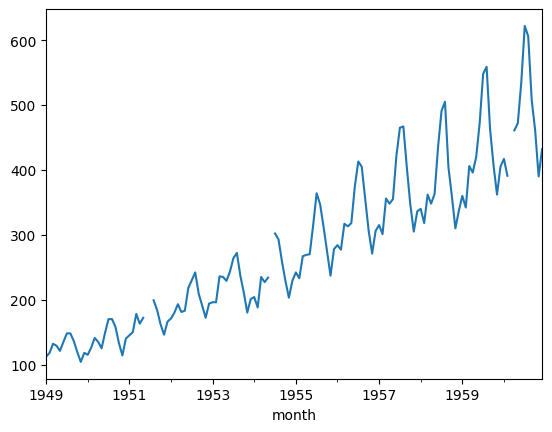

In [211]:
data.passengers.plot()

### Augmented dickey fuller test

In [213]:
from statsmodels.tsa.stattools import adfuller

In [214]:
adf_test=adfuller(data.linear_interpolation_inputation)

In [215]:
print("Adf tests statistics:", adf_test[0])

Adf tests statistics: 0.894608794082385


In [216]:
print("Critical value at 0.05 :",adf_test[4]['5%'])
print("P value: ",adf_test[1])

Critical value at 0.05 : -2.8840418343195267
P value:  0.9930195647605924


In [217]:
data2

,Month,Exchange Rate TWI,mwa
0,1,100.0,NaN
1,2,99.6,NaN
2,3,99.4,99.666667
3,4,99.1,99.366667
4,5,99.2,99.233333
...,...,...,...
299,300,49.6,52.000000
300,301,48.5,52.000000
301,302,48.4,52.000000
302,303,51.0,52.000000


In [218]:
data2.columns=['month','exchange_rate','mwa']

<Axes: >

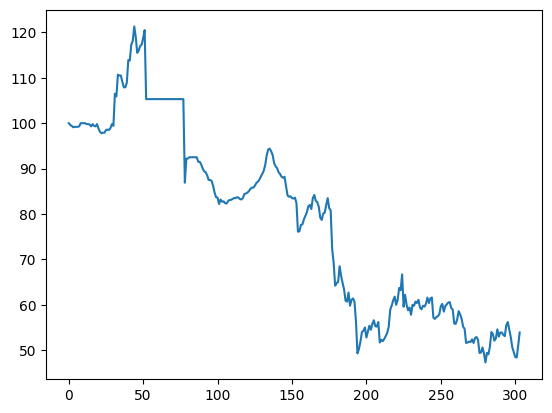

In [219]:
data2.exchange_rate.plot()

In [220]:
from statsmodels.tsa.stattools import kpss

In [221]:
kpss_test=kpss(data.linear_interpolation_inputation)

/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_20567/3736441604.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test=kpss(data.linear_interpolation_inputation)


In [222]:
print("kpss test statistics: ",kpss_test[0])
print("Critical value at 0.05% is ",kpss_test[3]['5%'])
print("P value of statistics: ",kpss_test[1])

kpss test statistics:  1.651189746942162
Critical value at 0.05% is  0.463
P value of statistics:  0.01


In [223]:
# doint test for exchange rate

In [224]:
test_result=adfuller(data2.exchange_rate)

In [225]:
print("ADF test statistics:",test_result[0])
print("Critical value of 0.05 is ",test_result[4]['5%'])
print("P value of statistics: ",test_result[1])

ADF test statistics: -0.8054678720541549
Critical value of 0.05 is  -2.8711265007266666
P value of statistics:  0.8175106426685046


In [226]:
test_result1=kpss(data2.exchange_rate)

/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_20567/3438585138.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  test_result1=kpss(data2.exchange_rate)


In [227]:
print("ADF test statistics:",test_result1[0])
print("Critical value of 0.05 is ",test_result1[3]['5%'])
print("P value of statistics: ",test_result1[1])

ADF test statistics: 2.6144892040709946
Critical value of 0.05 is  0.463
P value of statistics:  0.01


In [228]:
from scipy.stats import boxcox

In [229]:
transformedData=pd.Series(boxcox(data.linear_interpolation_inputation, lmbda=0), index=data.index)

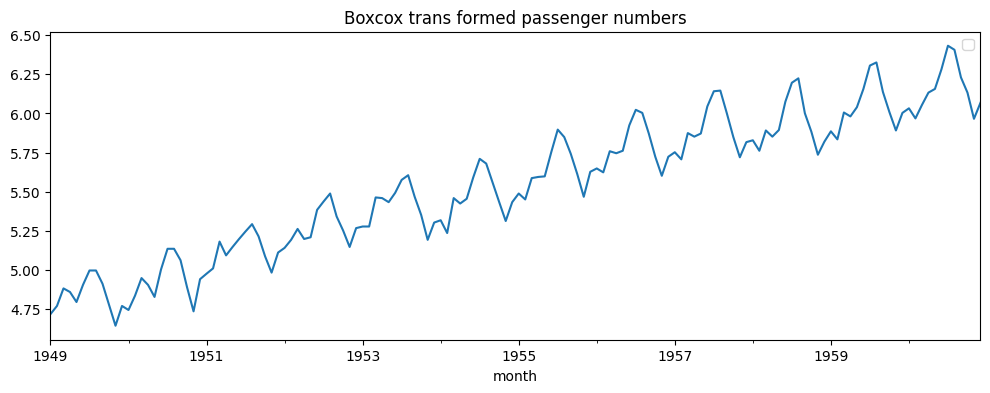

In [230]:
transformedData.plot(figsize=(12,4))
plt.title("Boxcox trans formed passenger numbers")
plt.legend(loc='best')

In [231]:
# Differencing
differenced=pd.Series(transformedData-transformedData.shift())

In [232]:
differenced.dropna(inplace=True)

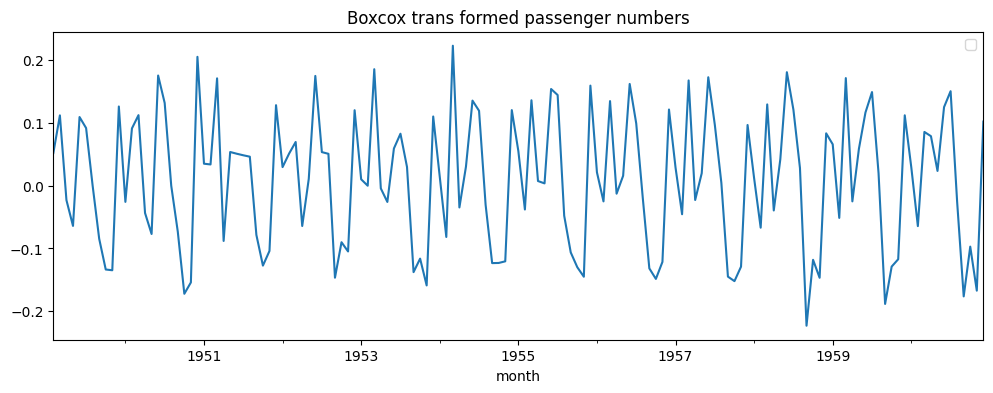

In [233]:
differenced.plot(figsize=(12,4))
plt.title("Boxcox trans formed passenger numbers")
plt.legend(loc='best')

In [234]:
kpss_test=kpss(differenced)

/var/folders/pb/lrccxhdn21v014jb8bt4rb_r0000gn/T/ipykernel_20567/3074157300.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test=kpss(differenced)


In [235]:
print("kpss test statistics: ",kpss_test[0])
print("Critical value at 0.05% is ",kpss_test[3]['5%'])
print("P value of statistics: ",kpss_test[1])

kpss test statistics:  0.03834116415771791
Critical value at 0.05% is  0.463
P value of statistics:  0.1


In [236]:
test_result=adfuller(data2.exchange_rate)

In [237]:
print("ADF test statistics:",test_result[0])
print("Critical value of 0.05 is ",test_result[4]['5%'])
print("P value of statistics: ",test_result[1])

ADF test statistics: -0.8054678720541549
Critical value of 0.05 is  -2.8711265007266666
P value of statistics:  0.8175106426685046


## This boxcox transformation and differenciation made our data stationary

In [239]:
from statsmodels.graphics.tsaplots import plot_acf

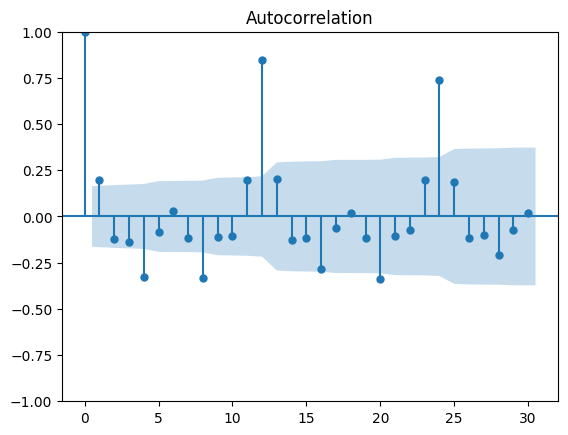

In [240]:
plot_acf(differenced, ax=plt.gca(), lags=30)
plt.show()

In [241]:
from statsmodels.graphics.tsaplots import plot_pacf

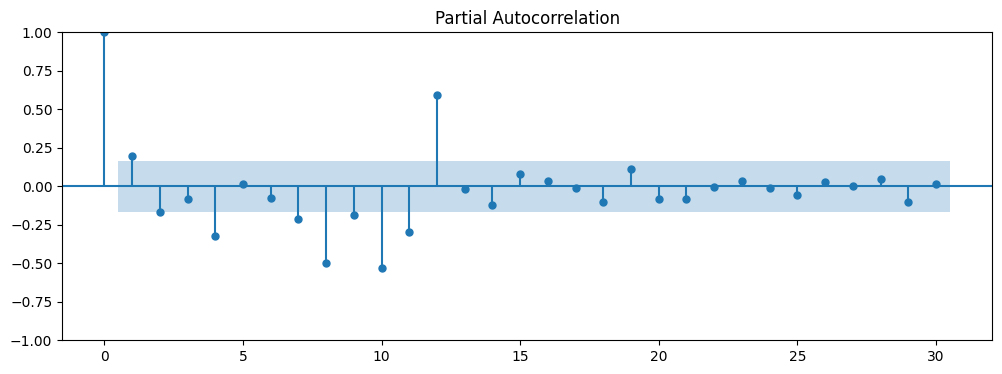

In [242]:
plt.figure(figsize=(12,4))
plot_pacf(differenced,ax=plt.gca(), lags=30)
plt.show()

## split data into train and test split

In [244]:
train_boxcox=transformedData[:int(train_len)]
test_box_cos=transformedData[int(train_len):]
train_diff=differenced[:int(train_len)-1]
test_diff=differenced[int(train_len)-1:]

In [245]:
from statsmodels.tsa.arima.model import ARIMA

In [246]:
model=ARIMA(train_diff, order=(1,0,0))
model=model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [247]:
print(model.params)

const     0.010883
ar.L1     0.158392
sigma2    0.010347
dtype: float64


In [248]:
y_hat_ar=differenced.copy()

In [249]:
y_hat_ar["forecast_ar"]=model.predict(differenced.index.min(),differenced.index.max())

In [250]:
y_hat_ar["forecast_boxcox"]=y_hat_ar["forecast_ar"].cumsum()
y_hat_ar["forecast_boxcox"]=y_hat_ar["forecast_boxcox"].add(transformedData[0])

In [251]:
y_hat_ar["forecast_original"]=np.exp(y_hat_ar["forecast_boxcox"])

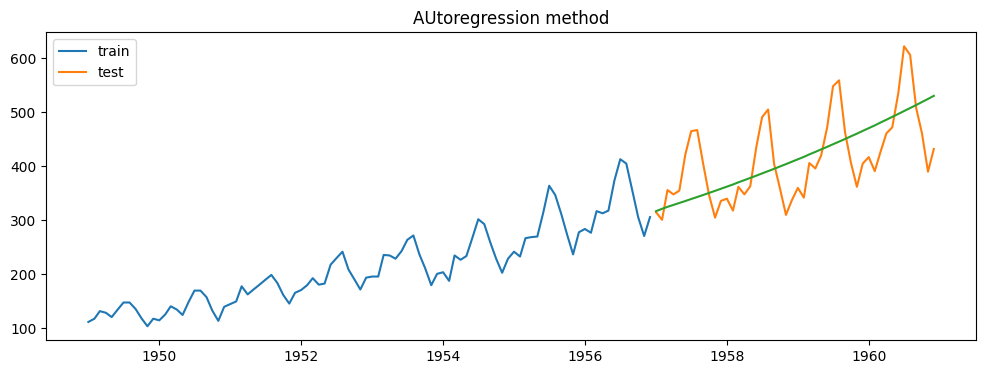

In [252]:
plt.figure(figsize=(12,4))
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(y_hat_ar["forecast_original"][test.index.min():])
plt.legend(loc='best')
plt.title("AUtoregression method")
plt.show()

In [253]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_ar['forecast_original'][test.index.min():]))
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_ar['forecast_original'][test.index.min():])*100/test.linear_interpolation_inputation)
results1=pd.DataFrame({"Method":["simple AR"], "RMSE":[rmse], "MAPE":[mape] })
results=pd.concat([results,results1])
results

,Method,RMSE,MAPE
0,naive,10.390000,23.550000
0,Average,14.140000,0.470000
0,Simple moving average 12,9.450000,19.253926
0,Simple moving average 6,8.860000,16.816108
0,Simple moving average 3,10.920000,26.476497
0,Holt winter additive method,11.610000,33.890000
0,Simple moving average 3 method,40.153000,47.811826
0,simple AR,7.391556,12.969876


## Moving average

In [255]:
model=ARIMA(train_diff, order=(0,0,1))
model=model.fit()
print(model.params)

const     0.010969
ma.L1     0.248089
sigma2    0.010197
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [256]:
y_hat_ma=differenced.copy()
y_hat_ma["ma_forecast_boxcox_diff"]=model.predict(differenced.index.min(),differenced.index.max())
y_hat_ma["ma_forecast_boxcox"]=y_hat_ma["ma_forecast_boxcox_diff"].cumsum()
y_hat_ma["ma_forecast_boxcox"]=y_hat_ma["ma_forecast_boxcox"].add(transformedData[0])
y_hat_ma["ma_forecast"]=np.exp(y_hat_ma["ma_forecast_boxcox"])

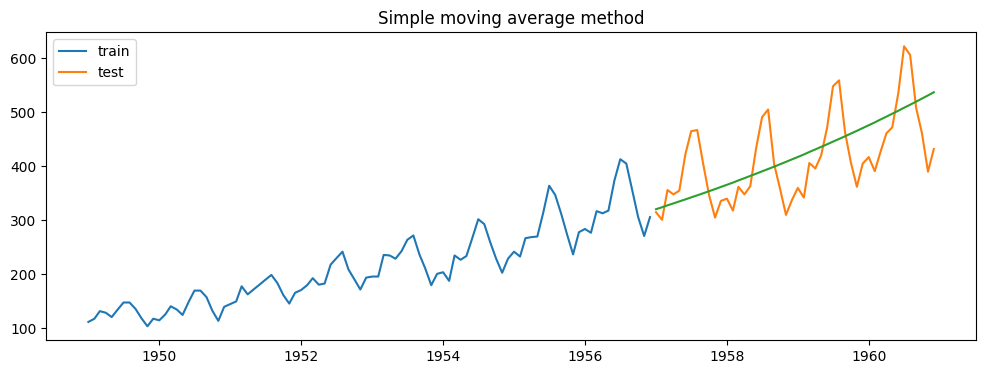

In [257]:
plt.figure(figsize=(12,4))
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(y_hat_ma["ma_forecast"][test.index.min():])
plt.legend(loc='best')
plt.title("Simple moving average method")
plt.show()

In [258]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_ar['forecast_original'][test.index.min():]))
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_ar['forecast_original'][test.index.min():])*100/test.linear_interpolation_inputation)
results1=pd.DataFrame({"Method":["simple moving average"], "RMSE":[rmse], "MAPE":[mape] })
results=pd.concat([results,results1])
results

,Method,RMSE,MAPE
0,naive,10.390000,23.550000
0,Average,14.140000,0.470000
0,Simple moving average 12,9.450000,19.253926
0,Simple moving average 6,8.860000,16.816108
0,Simple moving average 3,10.920000,26.476497
0,Holt winter additive method,11.610000,33.890000
0,Simple moving average 3 method,40.153000,47.811826
0,simple AR,7.391556,12.969876
0,simple moving average,7.391556,12.969876


In [259]:
results=results.drop(results.index[-1])

### AUto regressive moving average model

In [261]:
model=ARIMA(train_diff, order=(1,0,1))
model=model.fit()
print(model.params)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const     0.010900
ar.L1    -0.518478
ma.L1     0.774295
sigma2    0.009745
dtype: float64


In [262]:
y_hat_ma=differenced.copy()
y_hat_ma["ma_forecast_boxcox_diff"]=model.predict(differenced.index.min(),differenced.index.max())
y_hat_ma["ma_forecast_boxcox"]=y_hat_ma["ma_forecast_boxcox_diff"].cumsum()
y_hat_ma["ma_forecast_boxcox"]=y_hat_ma["ma_forecast_boxcox"].add(transformedData[0])
y_hat_ma["ma_forecast"]=np.exp(y_hat_ma["ma_forecast_boxcox"])

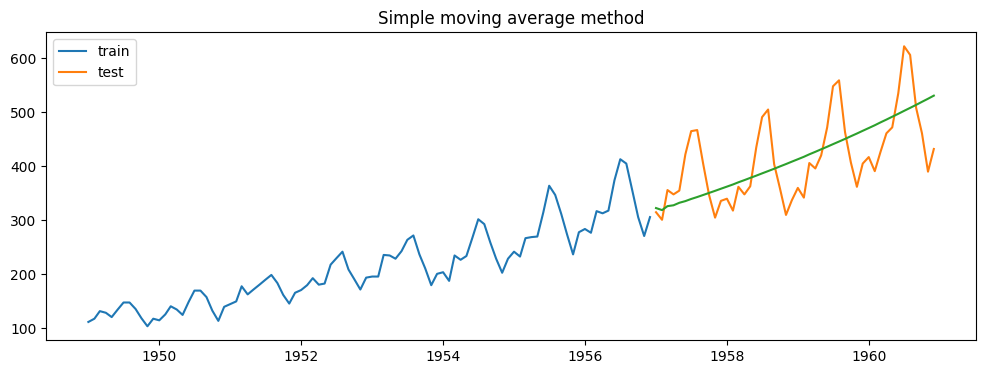

In [263]:
plt.figure(figsize=(12,4))
plt.plot(train.linear_interpolation_inputation, label='train')
plt.plot(test.linear_interpolation_inputation, label='test')
plt.plot(y_hat_ma["ma_forecast"][test.index.min():])
plt.legend(loc='best')
plt.title("Simple moving average method")
plt.show()

In [264]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_ar['forecast_original'][test.index.min():]))
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_ar['forecast_original'][test.index.min():])*100/test.linear_interpolation_inputation)
results1=pd.DataFrame({"Method":["ARMA"], "RMSE":[rmse], "MAPE":[mape] })
results=pd.concat([results,results1])
results

,Method,RMSE,MAPE
0,ARMA,7.391556,12.969876


In [530]:
model=ARIMA(transformedData, order=(1,1,1))
model=model.fit()
print(model.params)

ar.L1    -0.531680
ma.L1     0.816830
sigma2    0.010186
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [532]:
yt_arima=differenced.copy()
yt_arima["forcast_boxcox"]=model.predict(differenced.index.min(),differenced.index.max())
#yt_arima["forcast_boxcox"]=yt_arima["forcast_boxcox"].cumsum()
#yt_arima["forcast_boxcox"]=yt_arima["forcast_boxcox"].add(transformedData[0])
yt_arima["forcast"]=np.exp(yt_arima["forcast_boxcox"])

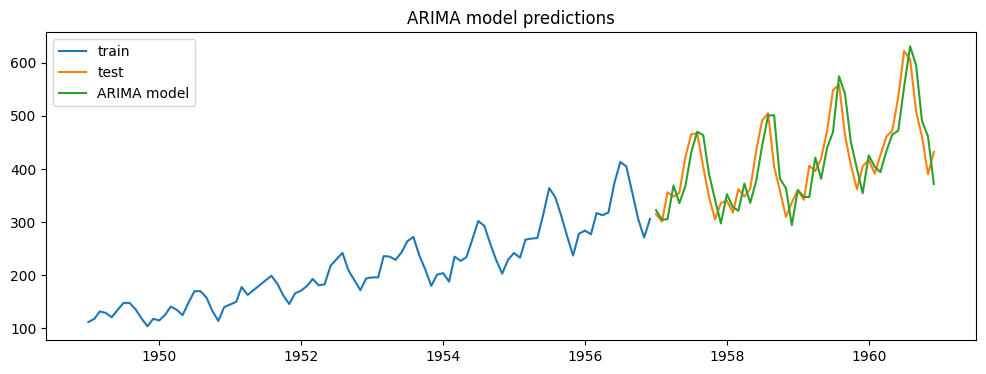

In [534]:
plt.figure(figsize=(12,4))
plt.plot(train.linear_interpolation_inputation, label="train")
plt.plot(test.linear_interpolation_inputation, label="test")
plt.plot(yt_arima["forcast"][test.index.min():], label="ARIMA model")
plt.title("ARIMA model predictions")
plt.legend(loc='best')
plt.show()

### Seasonal Auto regressive integrated moving average (sarima)

In [539]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [541]:
model=SARIMAX(differenced, order=(1,1,1), seasonal_order=(1,1,1,12))
model=model.fit()
print(model.params)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.52580D+00    |proj g|=  5.43297D+00

At iterate    5    f= -1.55408D+00    |proj g|=  1.90892D-01

At iterate   10    f= -1.57810D+00    |proj g|=  4.34002D+00

At iterate   15    f= -1.59951D+00    |proj g|=  1.90589D+00

At iterate   20    f= -1.62455D+00    |proj g|=  1.16160D-01

At iterate   25    f= -1.65132D+00    |proj g|=  1.95857D-01

At iterate   30    f= -1.65438D+00    |proj g|=  1.21092D-01

At iterate   35    f= -1.66293D+00    |proj g|=  1.02009D-01

At iterate   40    f= -1.66327D+00    |proj g|=  6.87479D-02

At iterate   45    f= -1.66338D+00    |proj g|=  5.66212D-02

At iterate   50    f= -1.66341D+00    |proj g|=  2.61527D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [547]:
y_hat_sarima=differenced.copy()
y_hat_sarima['forecast_boxcox']=model.predict(differenced.index.min(),differenced.index.max())
y_hat_sarima['forecast']=np.exp(y_hat_sarima['forecast_boxcox'])

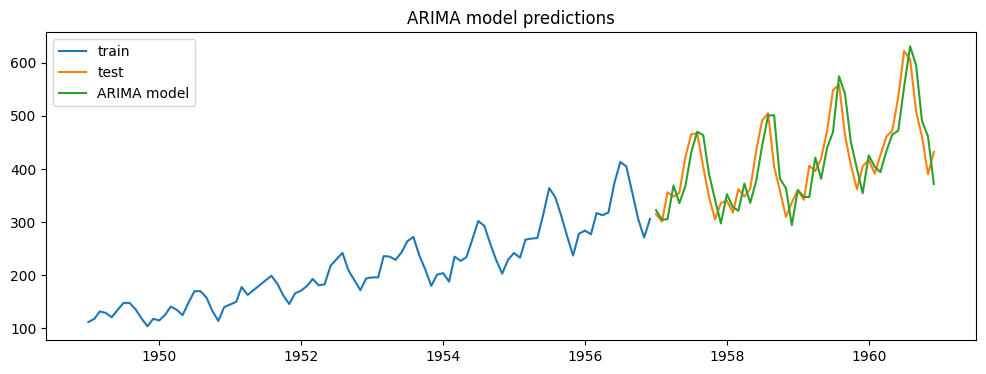

In [549]:
plt.figure(figsize=(12,4))
plt.plot(train.linear_interpolation_inputation, label="train")
plt.plot(test.linear_interpolation_inputation, label="test")
plt.plot(yt_arima["forcast"][test.index.min():], label="ARIMA model")
plt.title("ARIMA model predictions")
plt.legend(loc='best')
plt.show()

In [621]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,yt_arima["forcast"][test.index.min():]))
mape=np.mean(np.absolute(test.linear_interpolation_inputation-yt_arima["forcast"][test.index.min():])*100/test.linear_interpolation_inputation)
results1=pd.DataFrame({"Method":["SARIMA"], "RMSE":[rmse], "MAPE":[mape] })
results=pd.concat([results,results1])
results

,Method,RMSE,MAPE
0,ARMA,7.391556,12.969876
0,ARMA,7.391556,12.969876
0,SARIMA,7.391556,12.969876
0,SARIMA,6.068879,8.885326


In [557]:
promotion=pd.read_csv("promotion.csv", header=None)

In [559]:
promotion.columns=["month",'event']

In [563]:
promotion['month']=pd.to_datetime(promotion.month, format="%Y-%m")

In [567]:
promotion_train=promotion[:int(train_len)]
promotion_test=promotion[int(train_len):]

In [591]:
promotion.isna().sum()

month    0
event    0
dtype: int64

In [585]:
transformedData.shape, promotion_train.shape

((144,), (96, 2))

In [595]:
model=SARIMAX(train_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12), exog=np.asarray(promotion_train.event))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [603]:
model_fit=model.fit()
print(model_fit.params)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50536D+00    |proj g|=  5.37798D+00

At iterate    5    f= -1.53053D+00    |proj g|=  3.73984D-01

At iterate   10    f= -1.53472D+00    |proj g|=  4.97162D-01

At iterate   15    f= -1.54447D+00    |proj g|=  7.89522D-01

At iterate   20    f= -1.54734D+00    |proj g|=  5.14835D-01

At iterate   25    f= -1.56073D+00    |proj g|=  1.31044D+00

At iterate   30    f= -1.56864D+00    |proj g|=  1.98262D-02

At iterate   35    f= -1.56901D+00    |proj g|=  7.85428D-02

At iterate   40    f= -1.56928D+00    |proj g|=  1.17557D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [611]:
yhat_sarima=differenced.copy()
y_hat_sarima["forecast_boxcox"]=model_fit.predict(test_box_cos.index.min(),test_box_cos.index.max(),exog=np.asarray(promotion_test.event))
y_hat_sarima['forecast']=np.exp(y_hat_sarima['forecast_boxcox'])

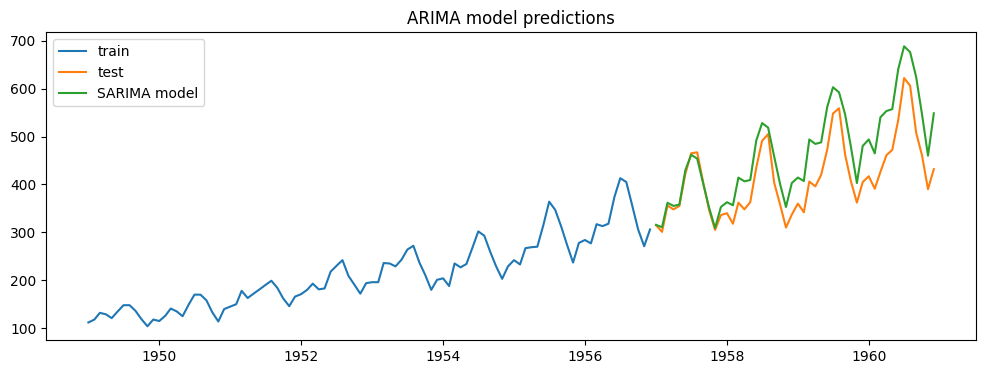

In [619]:
plt.figure(figsize=(12,4))
plt.plot(train.linear_interpolation_inputation, label="train")
plt.plot(test.linear_interpolation_inputation, label="test")
plt.plot(y_hat_sarima["forecast"][test_box_cos.index.min():], label="SARIMA model")
plt.title("ARIMA model predictions")
plt.legend(loc='best')
plt.show()

In [623]:
rmse=np.sqrt(mean_absolute_error(test.linear_interpolation_inputation,y_hat_sarima['forecast'][test.index.min():]))
mape=np.mean(np.absolute(test.linear_interpolation_inputation-y_hat_sarima['forecast'][test.index.min():])*100/test.linear_interpolation_inputation)
results1=pd.DataFrame({"Method":["SARIMAX"], "RMSE":[rmse], "MAPE":[mape] })
results=pd.concat([results,results1])
results

,Method,RMSE,MAPE
0,ARMA,7.391556,12.969876
0,ARMA,7.391556,12.969876
0,SARIMA,7.391556,12.969876
0,SARIMA,6.068879,8.885326
0,SARIMAX,7.211149,12.330445
